In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
import pandas as pd
plt.rcParams['figure.figsize'] = [15, 5]

In [ ]:
df_dpae = pd.read_excel("DPAE.xlsx", sheet_name="DPAE")
df_dpae.head(5)

,Annee,Trimestre,Dernier_jour_du_mois,Duree_de_contrat,Nature_de_contrat,DPAE_brut,DPAE_cvs
0,2000,1,2000-01-31,Contrat de plus d'un mois,CDD de plus d'un mois,276907,324827
1,2000,1,2000-01-31,Contrat de plus d'un mois,CDI,279422,227295
2,2000,1,2000-02-29,Contrat de plus d'un mois,CDI,221387,230751
3,2000,1,2000-02-29,Contrat de plus d'un mois,CDD de plus d'un mois,222280,322663
4,2000,1,2000-03-31,Contrat de plus d'un mois,CDD de plus d'un mois,267550,324818


In [ ]:
df_dpae2 = pd.read_excel("DPAE.xlsx", sheet_name="code")
df_dpae2.head(2)

,Unnamed: 0,Unnamed: 1
0,Année,annee[date] Année
1,Trimestre,"trimestre[int] Trimestre (1, 2, 3 ou 4)"


Text(0.5, 1.0, "CDD + d'un mois")

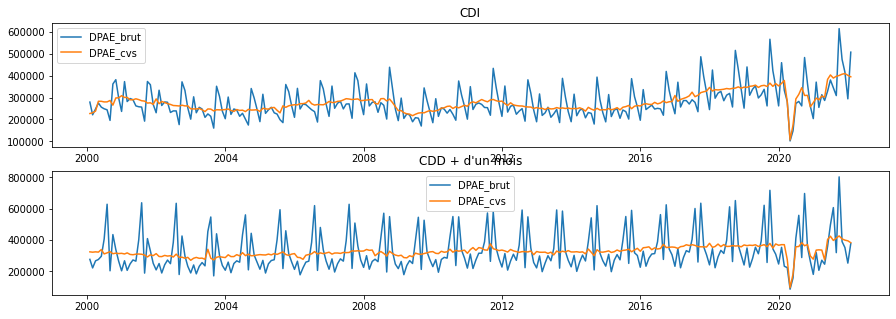

In [ ]:
#Plot the data of DPAE on two graphs, one for CDI and one for CDD
fig, [ax1, ax2] = plt.subplots(nrows=2, ncols=1)

df_cdi = df_dpae[df_dpae["Nature_de_contrat"]=="CDI"]
df_cdi.index = pd.date_range('2000 Jan 1', periods = len(df_cdi), freq='M')
df_cdd = df_dpae[df_dpae["Nature_de_contrat"]=="CDD de plus d'un mois"]
df_cdd.index = pd.date_range('2000 Jan 1', periods = len(df_cdd), freq='M')

ax1.plot(df_cdi.index,df_cdi["DPAE_brut"],label="DPAE_brut")
ax1.plot(df_cdi.index,df_cdi["DPAE_cvs"],label="DPAE_cvs")
ax1.legend()
ax1.set_title("CDI")

ax2.plot(df_cdd.index,df_cdd["DPAE_brut"],label="DPAE_brut")
ax2.plot(df_cdd.index,df_cdd["DPAE_cvs"],label="DPAE_cvs")
ax2.legend()
ax2.set_title("CDD + d'un mois")

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))
No handles with labels found to put in legend.
/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))
No handles with labels found to put in legend.


Text(0.5, 1.0, "CDD + d'un mois")

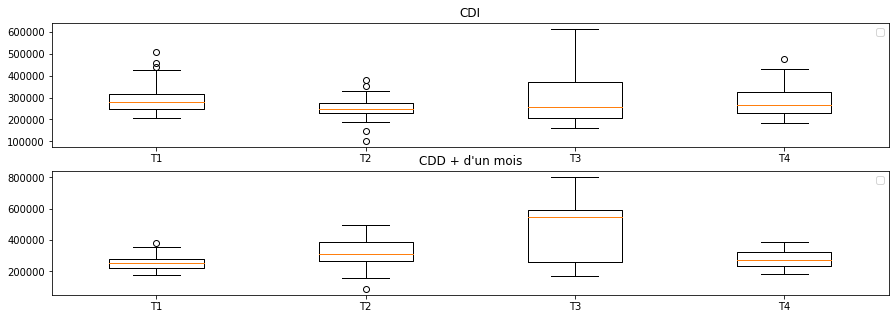

In [ ]:
#Display the boxplot on the 4 quarters (T1, T2, T3, T4) of the year
fig, [ax1, ax2] = plt.subplots(nrows=2, ncols=1)

T_cdi = [df_cdi[df_cdi["Trimestre"]==1]["DPAE_brut"],df_cdi[df_cdi["Trimestre"]==2]["DPAE_brut"],df_cdi[df_cdi["Trimestre"]==3]["DPAE_brut"],df_cdi[df_cdi["Trimestre"]==4]["DPAE_brut"]]
T_cdd = [df_cdd[df_cdd["Trimestre"]==1]["DPAE_brut"],df_cdd[df_cdd["Trimestre"]==2]["DPAE_brut"],df_cdd[df_cdd["Trimestre"]==3]["DPAE_brut"],df_cdd[df_cdd["Trimestre"]==4]["DPAE_brut"]]


ax1.boxplot(T_cdi,labels=["T1","T2","T3","T4"])
ax1.legend()
ax1.set_title("CDI")

ax2.boxplot(T_cdd,labels=["T1","T2","T3","T4"])
ax2.legend()
ax2.set_title("CDD + d'un mois")

In [ ]:
print(df_cdi.groupby("Annee")["DPAE_brut"].describe())
print("\n--------------------------------------------\n")
print(df_cdd.groupby("Annee")["DPAE_brut"].describe())

       count           mean            std       min        25%       50%  \
Annee                                                                       
2000    12.0  270732.583333   54472.848807  195881.0  242387.50  252626.5   
2001    12.0  286915.250000   56393.716584  192441.0  257840.75  275446.5   
2002    12.0  266949.000000   56819.623404  176587.0  237466.50  258661.0   
2003    12.0  245644.083333   52473.147414  160655.0  213378.00  234450.0   
2004    12.0  242847.333333   49451.485672  174707.0  211554.50  235678.0   
2005    12.0  253735.666667   54117.948747  185758.0  221078.75  237346.0   
2006    12.0  271258.333333   55551.777344  188386.0  242314.75  261907.5   
2007    12.0  287716.750000   62420.265189  205539.0  250553.25  272876.0   
2008    12.0  281955.750000   69338.786798  194792.0  244443.50  270854.5   
2009    12.0  231316.916667   52052.709746  170202.0  201139.50  214397.0   
2010    12.0  254545.666667   51403.651086  196671.0  221443.75  246493.0   

In [ ]:
df = pd.read_excel('EESSA.xlsx')
df.head()

,Libellé,idBank,Dernière mise à jour,Période,1970-T4,1971-T1,1971-T2,1971-T3,1971-T4,1972-T1,...,2019-T3,2019-T4,2020-T1,2020-T2,2020-T3,2020-T4,2021-T1,2021-T2,2021-T3,2021-T4
0,Emplois salariés trimestriels - Secteurs princ...,1577239,12/05/2017 00:00,NaN,12409.6,12418.8,12485.6,12576.1,12628.8,12689,...,(O),(O),(O),(O),(O),(O),(O),(O),(O),(O)
1,Emplois salariés trimestriels - Industrie - Se...,1577235,09/03/2022 07:30,NaN,5447.9,5466.3,5494.7,5529.1,5534.1,5543.1,...,3166,3165.2,3153.7,3130,3122.5,3110.2,3117.4,3120.8,3126.3,3131.3
2,Emplois salariés trimestriels - Construction -...,1577236,09/03/2022 07:30,NaN,1760.3,1759.6,1764.1,1767.8,1761.1,1757.3,...,1423.5,1431.7,1434,1438.1,1454.2,1462.5,1493.5,1494.5,1493,1499.3
3,Emplois salariés trimestriels - Tertiaire marc...,1577237,09/03/2022 07:30,NaN,5349.1,5340.5,5375.2,5428.6,5483.5,5539.3,...,12525.8,12581.9,12130.9,12025.3,12302.5,12231.7,12329.9,12606.7,12715.9,12815.1
4,Emplois salariés trimestriels - Industries ext...,1577241,09/03/2022 07:30,NaN,293.2,293.5,293.9,294.2,294.3,294.6,...,376.8,377.3,377.4,376.1,376.9,376.9,378.9,380.1,380.5,381


In [ ]:
print(df.columns[4:][:])

time = []

for date in df.columns:
  if date[5:] == 'T1':
    time.append(date[0:5] + '01')
  if date[5:] == 'T2':
    time.append(date[0:5] + '04')
  if date[5:] == 'T3':
    time.append(date[0:5] + '07')
  if date[5:] == 'T4':
    time.append(date[0:5] + '10')

index = pd.to_datetime(np.array(time))

Index(['1970-T4', '1971-T1', '1971-T2', '1971-T3', '1971-T4', '1972-T1',
       '1972-T2', '1972-T3', '1972-T4', '1973-T1',
       ...
       '2019-T3', '2019-T4', '2020-T1', '2020-T2', '2020-T3', '2020-T4',
       '2021-T1', '2021-T2', '2021-T3', '2021-T4'],
      dtype='object', length=205)


In [ ]:
ESSA = pd.DataFrame()

for row in df.Libellé:
  data = np.array(df[df.Libellé == row].drop(columns=['Libellé', 'idBank', 'Dernière mise à jour', 'Période']))[0]
  df_essa = pd.DataFrame(data=data, index=index)
  ESSA[row] = df_essa

ESSA.index.name = 'Trimestre'
ESSA.head()

,"Emplois salariés trimestriels - Secteurs principalement marchands - Toutes sections hors A, O, P, Q et U - CVS - Série arrêtée","Emplois salariés trimestriels - Industrie - Sections B, C, D et E - CVS",Emplois salariés trimestriels - Construction - Section F - CVS,"Emplois salariés trimestriels - Tertiaire marchand - Sections G, H, I, J, K, L, M, N, R, S, T - CVS","Emplois salariés trimestriels - Industries extractives, énergie, eau, gestion des déchets et dépollution - A17 : DE - CVS","Emplois salariés trimestriels - Fabrication de denrées alimentaires, de boissons et de produits à base de tabac - A17 : C1 - CVS",Emplois salariés trimestriels - Cokéfaction et raffinage - A17 : C2 - CVS,"Emplois salariés trimestriels - Fabrication d'équipements électriques, électroniques, informatiques, fabrication de machines - A17 : C3 - CVS",Emplois salariés trimestriels - Fabrication de matériels de transport - A17 : C4 - CVS,Emplois salariés trimestriels - Fabrication d'autres produits industriels - A17 : C5 - CVS,...,Emplois salariés trimestriels - Industrie manufacturière - Section C - CVS,"Emplois salariés trimestriels - Industrie - Établissements privés - Sections B, C, D et E - CVS",Emplois salariés trimestriels - Construction - Établissements privés - Section F - CVS,"Emplois salariés trimestriels - Tertiaire marchand hors intérim - Sections G, H, I, J, K, L, M, N, R, S, T, hors intérim - CVS","Emplois salariés trimestriels - Tertiaire marchand - Établissements privés - Sections G, H, I, J, K, L, M, N, R, S, T - CVS",Emplois salariés trimestriels - Tertiaire non marchand - Établissements privés - Sections O et Q - CVS,Emplois salariés trimestriels - Ensemble des salariés - Toutes les sections (hors activités extra-territoriales) - CVS,"Emplois salariés trimestriels - Ensemble des salariés, public - Toutes les sections (hors activités extra-territoriales), public - CVS","Emplois salariés trimestriels - Ensemble des salariés, privé - Toutes les sections (hors activités extra-territoriales) - CVS",Emplois salariés trimestriels - Tertiaire non marchand - Sections O et Q - CVS
Trimestre,,,,,,,,,,,,,,,,,,,,,
1970-10-01,12409.6,5447.9,1760.3,5349.1,293.2,507.1,36.5,781.6,558.5,3271,...,(O),(O),(O),(O),(O),(O),(O),(O),(O),(O)
1971-01-01,12418.8,5466.3,1759.6,5340.5,293.5,508.2,36,783.7,566.1,3278.8,...,(O),(O),(O),(O),(O),(O),(O),(O),(O),(O)
1971-04-01,12485.6,5494.7,1764.1,5375.2,293.9,514.3,35.7,788.2,570.6,3292,...,(O),(O),(O),(O),(O),(O),(O),(O),(O),(O)
1971-07-01,12576.1,5529.1,1767.8,5428.6,294.2,523,35.2,794.4,574.3,3308,...,(O),(O),(O),(O),(O),(O),(O),(O),(O),(O)
1971-10-01,12628.8,5534.1,1761.1,5483.5,294.3,514.5,34.8,798.5,575.4,3316.6,...,(O),(O),(O),(O),(O),(O),(O),(O),(O),(O)


In [ ]:
print("Nombre de Libellé: ", ESSA.shape[0])
print("Nombre de trimestre: ", ESSA.shape[1])

Nombre de Libellé:  205
Nombre de trimestre:  80


In [ ]:
ESSA = ESSA.replace('(O)', np.NaN)

In [ ]:
ESSA.isna().sum()

Emplois salariés trimestriels - Secteurs principalement marchands - Toutes sections hors A, O, P, Q et U - CVS - Série arrêtée             19
Emplois salariés trimestriels - Industrie - Sections B, C, D et E - CVS                                                                     0
Emplois salariés trimestriels - Construction - Section F - CVS                                                                              0
Emplois salariés trimestriels - Tertiaire marchand - Sections G, H, I, J, K, L, M, N, R, S, T - CVS                                         0
Emplois salariés trimestriels - Industries extractives, énergie, eau, gestion des déchets et dépollution - A17 : DE - CVS                   0
                                                                                                                                         ... 
Emplois salariés trimestriels - Tertiaire non marchand - Établissements privés - Sections O et Q - CVS                                    160
Emploi

In [ ]:
ESSA

,"Emplois salariés trimestriels - Secteurs principalement marchands - Toutes sections hors A, O, P, Q et U - CVS - Série arrêtée","Emplois salariés trimestriels - Industrie - Sections B, C, D et E - CVS",Emplois salariés trimestriels - Construction - Section F - CVS,"Emplois salariés trimestriels - Tertiaire marchand - Sections G, H, I, J, K, L, M, N, R, S, T - CVS","Emplois salariés trimestriels - Industries extractives, énergie, eau, gestion des déchets et dépollution - A17 : DE - CVS","Emplois salariés trimestriels - Fabrication de denrées alimentaires, de boissons et de produits à base de tabac - A17 : C1 - CVS",Emplois salariés trimestriels - Cokéfaction et raffinage - A17 : C2 - CVS,"Emplois salariés trimestriels - Fabrication d'équipements électriques, électroniques, informatiques, fabrication de machines - A17 : C3 - CVS",Emplois salariés trimestriels - Fabrication de matériels de transport - A17 : C4 - CVS,Emplois salariés trimestriels - Fabrication d'autres produits industriels - A17 : C5 - CVS,...,Emplois salariés trimestriels - Industrie manufacturière - Section C - CVS,"Emplois salariés trimestriels - Industrie - Établissements privés - Sections B, C, D et E - CVS",Emplois salariés trimestriels - Construction - Établissements privés - Section F - CVS,"Emplois salariés trimestriels - Tertiaire marchand hors intérim - Sections G, H, I, J, K, L, M, N, R, S, T, hors intérim - CVS","Emplois salariés trimestriels - Tertiaire marchand - Établissements privés - Sections G, H, I, J, K, L, M, N, R, S, T - CVS",Emplois salariés trimestriels - Tertiaire non marchand - Établissements privés - Sections O et Q - CVS,Emplois salariés trimestriels - Ensemble des salariés - Toutes les sections (hors activités extra-territoriales) - CVS,"Emplois salariés trimestriels - Ensemble des salariés, public - Toutes les sections (hors activités extra-territoriales), public - CVS","Emplois salariés trimestriels - Ensemble des salariés, privé - Toutes les sections (hors activités extra-territoriales) - CVS",Emplois salariés trimestriels - Tertiaire non marchand - Sections O et Q - CVS
Trimestre,,,,,,,,,,,,,,,,,,,,,
1970-10-01,12409.6,5447.9,1760.3,5349.1,293.2,507.1,36.5,781.6,558.5,3271.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1971-01-01,12418.8,5466.3,1759.6,5340.5,293.5,508.2,36.0,783.7,566.1,3278.8,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1971-04-01,12485.6,5494.7,1764.1,5375.2,293.9,514.3,35.7,788.2,570.6,3292.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1971-07-01,12576.1,5529.1,1767.8,5428.6,294.2,523.0,35.2,794.4,574.3,3308.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1971-10-01,12628.8,5534.1,1761.1,5483.5,294.3,514.5,34.8,798.5,575.4,3316.6,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-10-01,NaN,3110.2,1462.5,12231.7,376.9,589.2,8.9,410.1,335.0,1390.1,...,2733.3,3060.5,1460.5,11494.8,12048.7,2503.1,25200.7,5818.1,19382.6,8080.4
2021-01-01,NaN,3117.4,1493.5,12329.9,378.9,597.7,8.8,409.6,332.4,1390.0,...,2738.5,3067.2,1491.5,11582.3,12144.4,2535.9,25365.1,5815.5,19549.6,8107.5
2021-04-01,NaN,3120.8,1494.5,12606.7,380.1,603.1,8.8,409.2,330.2,1389.3,...,2740.6,3070.2,1492.5,11835.6,12414.6,2544.8,25670.4,5837.5,19832.9,8131.5


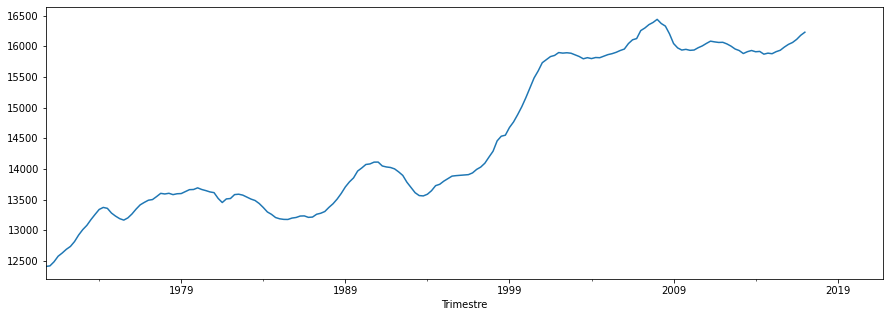

In [ ]:
ESSA['Emplois salariés trimestriels - Secteurs principalement marchands - Toutes sections hors A, O, P, Q et U - CVS - Série arrêtée'].plot()

In [ ]:
ESSA_sum = pd.DataFrame(data=ESSA.sum(axis=1), index=index, columns = ['ESSA'])
ESSA_sum.index.name = 'Trimestre'
ESSA_sum

,ESSA
Trimestre,
1970-10-01,44124.2
1971-01-01,44157.7
1971-04-01,44401.5
1971-07-01,44724.5
1971-10-01,44905.9
...,...
2020-10-01,166021.1
2021-01-01,167141.5
2021-04-01,169398.2


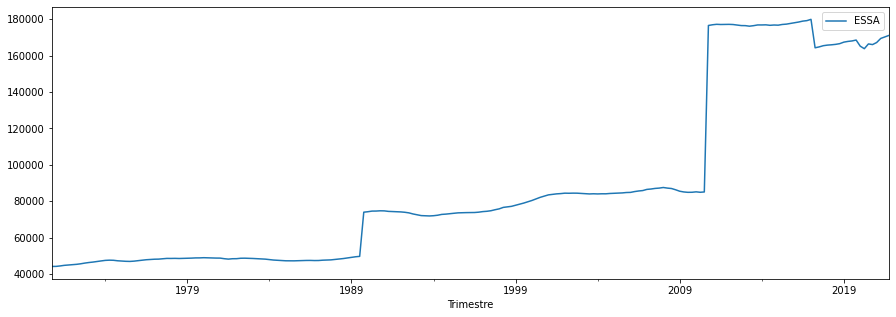

In [ ]:
ESSA_sum.plot()

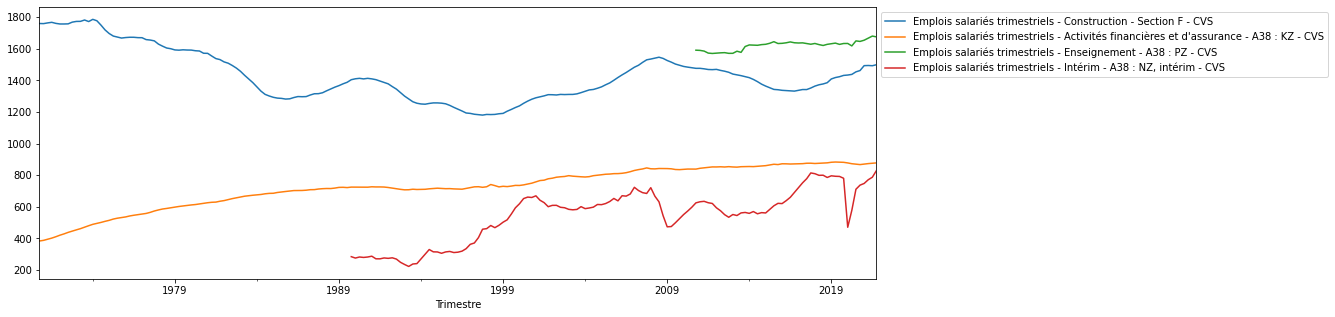

In [ ]:
ESSA["Emplois salariés trimestriels - Construction - Section F - CVS"].plot()
ESSA["Emplois salariés trimestriels - Activités financières et d'assurance - A38 : KZ - CVS"].plot()
ESSA["Emplois salariés trimestriels - Enseignement - A38 : PZ - CVS"].plot()
ESSA["Emplois salariés trimestriels - Intérim - A38 : NZ, intérim - CVS"].plot()

plt.legend(bbox_to_anchor=(1.0, 1.0))

In [ ]:
ESSA_sum.describe()

,ESSA
count,205.000000
mean,88237.901951
std,47353.190889
min,44124.200000
25%,48391.400000
50%,74429.300000
75%,86452.600000
max,179877.800000


In [ ]:
ESSA["Emplois salariés trimestriels - Construction - Section F - CVS"].describe()

count     205.000000
mean     1431.441951
std       158.907811
min      1180.400000
25%      1311.400000
50%      1406.300000
75%      1517.200000
max      1786.600000
Name: Emplois salariés trimestriels - Construction - Section F - CVS, dtype: float64

In [ ]:
ESSA["Emplois salariés trimestriels - Activités financières et d'assurance - A38 : KZ - CVS"].describe()

count    205.00000
mean     723.61561
std      126.03691
min      383.30000
25%      670.30000
50%      724.50000
75%      839.50000
max      883.30000
Name: Emplois salariés trimestriels - Activités financières et d'assurance - A38 : KZ - CVS, dtype: float64

In [ ]:
ESSA["Emplois salariés trimestriels - Enseignement - A38 : PZ - CVS"].describe()

count      45.000000
mean     1621.231111
std        29.414775
min      1570.700000
25%      1591.400000
50%      1628.700000
75%      1636.900000
max      1680.700000
Name: Emplois salariés trimestriels - Enseignement - A38 : PZ - CVS, dtype: float64

In [ ]:
ESSA["Emplois salariés trimestriels - Intérim - A38 : NZ, intérim - CVS"].describe()

count    129.000000
mean     545.005426
std      167.103256
min      222.200000
25%      458.000000
50%      583.700000
75%      652.700000
max      829.400000
Name: Emplois salariés trimestriels - Intérim - A38 : NZ, intérim - CVS, dtype: float64

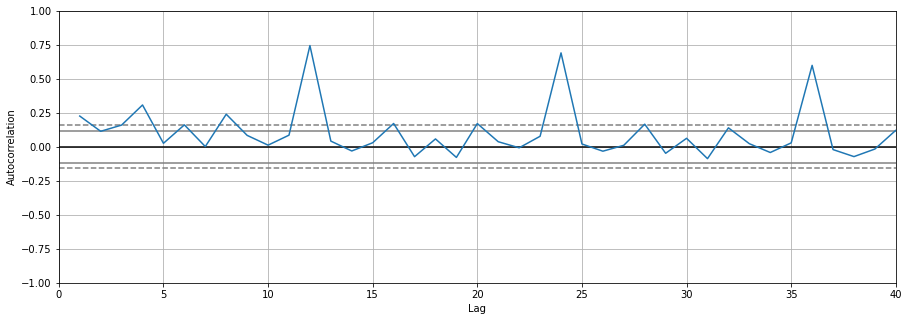

In [ ]:
#evaluate the trend and the seasonality of the data and show the autocorrelation plot
s_cdi = df_cdi["DPAE_brut"].squeeze()
s_time = df_cdi.index

fig,ax3 = plt.subplots(nrows=1,ncols=1)

ax3.axis([0, 40, -1, 1]) # zoom
pd.plotting.autocorrelation_plot(s_cdi,ax=ax3)

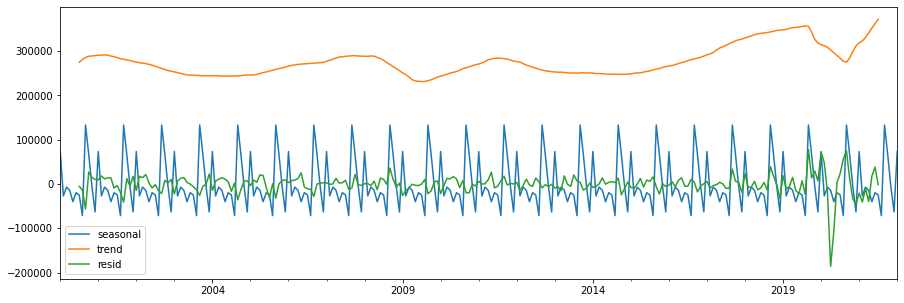

In [ ]:
from pandas._libs.tslibs.period import period_asfreq
from statsmodels.tsa.seasonal import seasonal_decompose

#get the trend and the seasonality
decomposition = seasonal_decompose(df_cdi["DPAE_brut"],freq=12)
trend = decomposition.trend
resid = decomposition.resid
seasonal = decomposition.seasonal


seasonal.plot(label="seasonal")
trend.plot(label="trend")
resid.plot(label="resid")

plt.legend()

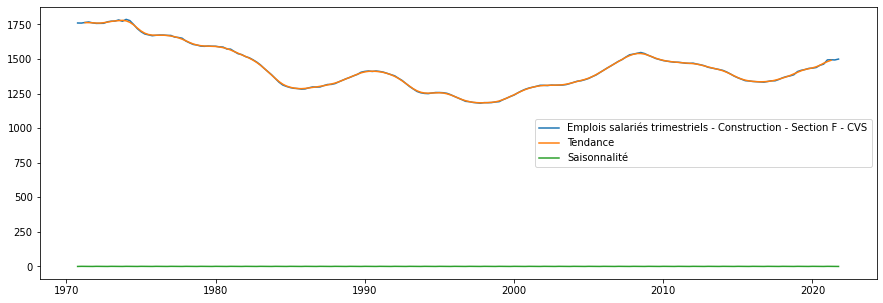

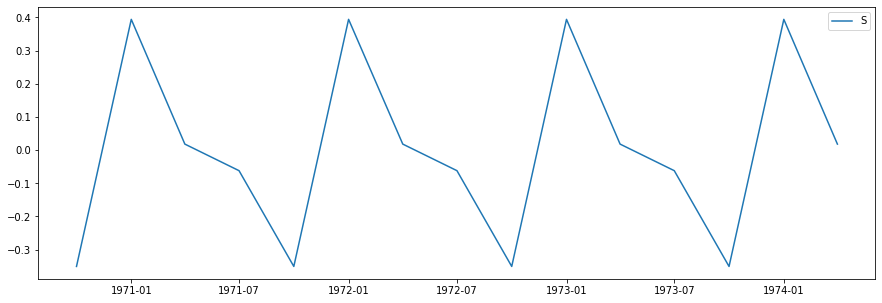

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

data = ESSA["Emplois salariés trimestriels - Construction - Section F - CVS"].dropna()
decomposition = seasonal_decompose(data)

plt.plot(data.index, data)
plt.plot(data.index, decomposition.trend)
plt.plot(data.index, decomposition.seasonal)
plt.legend(["Emplois salariés trimestriels - Construction - Section F - CVS", "Tendance", "Saisonnalité"])
plt.figure()
#Zoom sur la saisonnalité
plt.plot(data.index[0:15], decomposition.seasonal[0:15])
plt.legend("Saisonnalité")

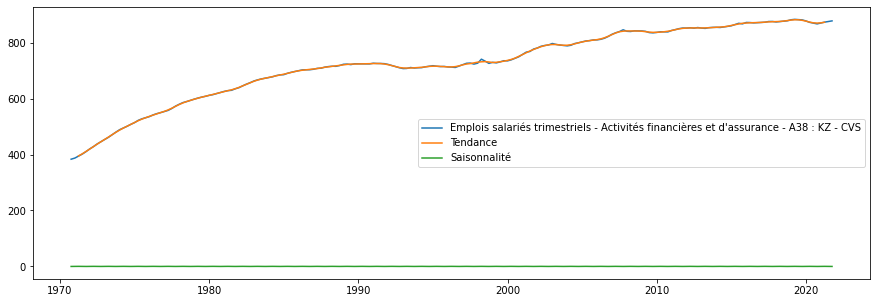

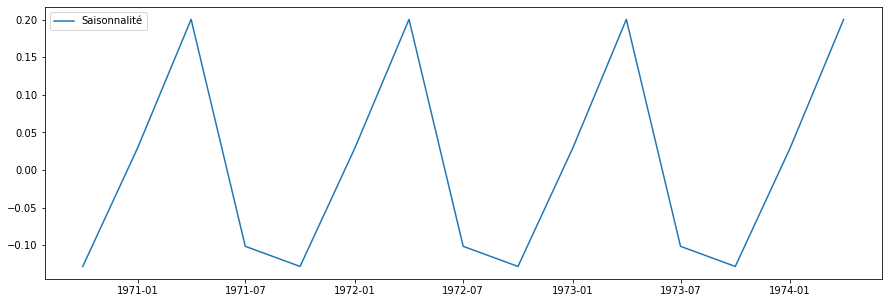

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

data = ESSA["Emplois salariés trimestriels - Activités financières et d'assurance - A38 : KZ - CVS"].dropna()
decomposition = seasonal_decompose(data)

plt.plot(data.index, data)
plt.plot(data.index, decomposition.trend)
plt.plot(data.index, decomposition.seasonal)
plt.legend(["Emplois salariés trimestriels - Activités financières et d'assurance - A38 : KZ - CVS", "Tendance", "Saisonnalité"])
plt.figure()
#Zoom sur la saisonnalité
plt.plot(data.index[0:15], decomposition.seasonal[0:15])
plt.legend(["Saisonnalité"])

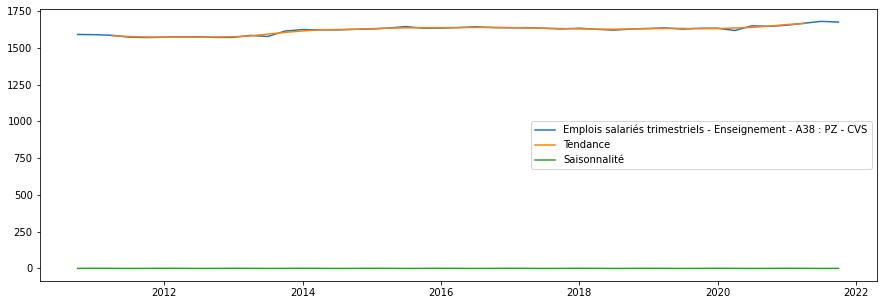

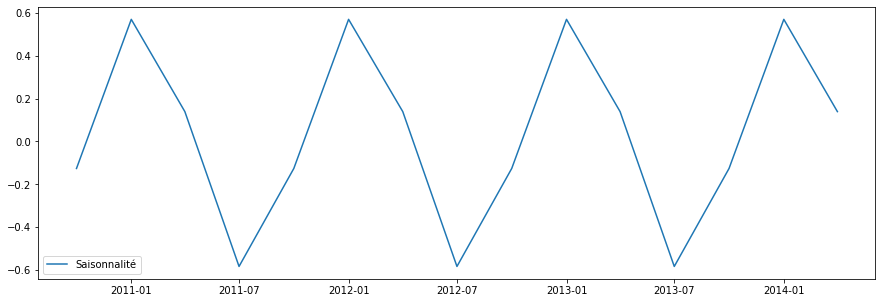

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

data = ESSA["Emplois salariés trimestriels - Enseignement - A38 : PZ - CVS"].dropna()
decomposition = seasonal_decompose(data)

plt.plot(data.index, data)
plt.plot(data.index, decomposition.trend)
plt.plot(data.index, decomposition.seasonal)
plt.legend(["Emplois salariés trimestriels - Enseignement - A38 : PZ - CVS", "Tendance", "Saisonnalité"])
plt.figure()
#Zoom sur la saisonnalité
plt.plot(data.index[0:15], decomposition.seasonal[0:15])
plt.legend(["Saisonnalité"])

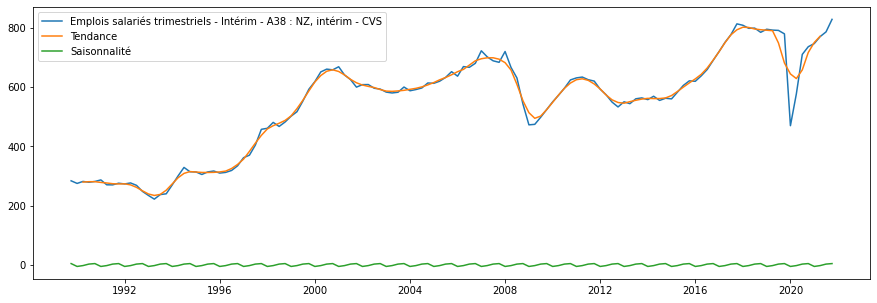

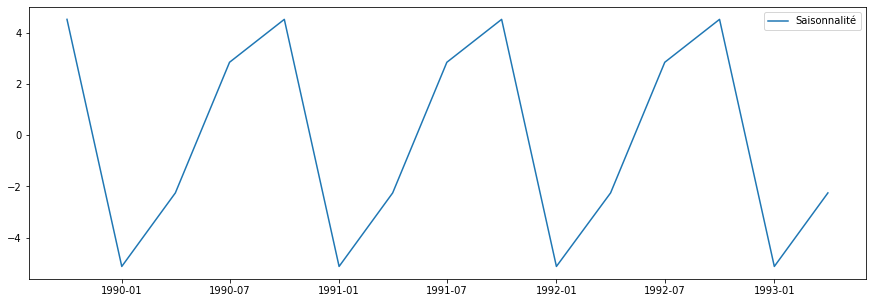

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

data = ESSA["Emplois salariés trimestriels - Intérim - A38 : NZ, intérim - CVS"].dropna()
decomposition = seasonal_decompose(data)

plt.plot(data.index, data)
plt.plot(data.index, decomposition.trend)
plt.plot(data.index, decomposition.seasonal)
plt.legend(["Emplois salariés trimestriels - Intérim - A38 : NZ, intérim - CVS", "Tendance", "Saisonnalité"])
plt.figure()
#Zoom sur la saisonnalité
plt.plot(data.index[0:15], decomposition.seasonal[0:15])
plt.legend(["Saisonnalité"])

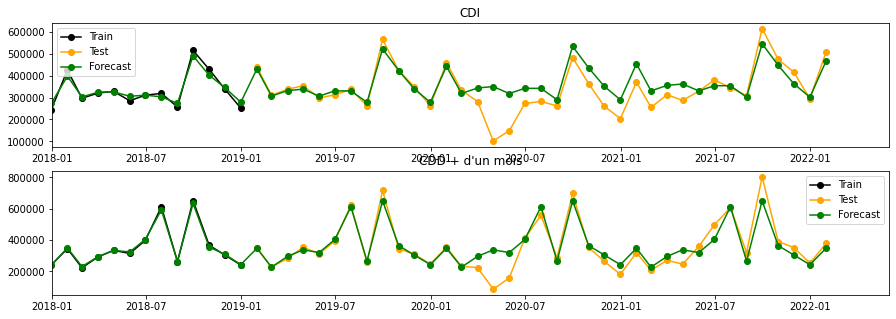

In [ ]:
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt
#Split your data into training and test sets to make predictions using exponential smoothing on the DPAE (CDI and CDD) data.
train_cdi = df_cdi[df_cdi["Annee"]<=2018]
test_cdi = df_cdi[df_cdi["Annee"]>2018]

fit_cdi = ExponentialSmoothing(np.asarray(train_cdi["DPAE_brut"]), trend='add', seasonal='add', seasonal_periods=12).fit()
forecast_test_cdi = fit_cdi.forecast(len(test_cdi))
#the full forecast curve is :
full_forecast_curve_cdi = np.concatenate((fit_cdi.fittedvalues, forecast_test_cdi))

fig, (ax4,ax5) = plt.subplots(nrows=2,ncols=1)
ax4.plot(train_cdi["DPAE_brut"], marker="o", color="black", label='Train')
ax4.plot(test_cdi["DPAE_brut"], marker="o", color="orange", label='Test')
ax4.plot(df_cdi.index,full_forecast_curve_cdi, marker="o", color="green", label='Forecast')
#zoom the plt to see the forecast
ax4.set_xlim(dt.datetime(2018, 1, 1), dt.datetime(2022, 6, 1), -1, 1)
ax4.legend()
ax4.set_title("CDI")

#same for CDD
train_cdd = df_cdd[df_cdd["Annee"]<=2018]
test_cdd = df_cdd[df_cdd["Annee"]>2018]

fit_cdd = ExponentialSmoothing(np.asarray(train_cdd["DPAE_brut"]), trend='add', seasonal='add', seasonal_periods=12).fit()
forecast_test_cdd = fit_cdd.forecast(len(test_cdd))

full_forecast_curve_cdd = np.concatenate((fit_cdd.fittedvalues, forecast_test_cdd))

ax5.plot(train_cdd["DPAE_brut"], marker="o", color="black", label='Train')
ax5.plot(test_cdd["DPAE_brut"], marker="o", color="orange", label='Test')
ax5.plot(df_cdd.index,full_forecast_curve_cdd, marker="o", color="green", label='Forecast')
ax5.set_xlim(dt.datetime(2018, 1, 1), dt.datetime(2022, 6, 1), -1, 1)
ax5.legend()
ax5.set_title("CDD + d'un mois")
plt.show()




In [ ]:
train_cdi.head()

,Annee,Trimestre,Dernier_jour_du_mois,Duree_de_contrat,Nature_de_contrat,DPAE_brut,DPAE_cvs
2000-01-31,2000,1,2000-01-31,Contrat de plus d'un mois,CDI,279422,227295
2000-02-29,2000,1,2000-02-29,Contrat de plus d'un mois,CDI,221387,230751
2000-03-31,2000,1,2000-03-31,Contrat de plus d'un mois,CDI,248015,238385
2000-04-30,2000,2,2000-04-30,Contrat de plus d'un mois,CDI,275262,283226
2000-05-31,2000,2,2000-05-31,Contrat de plus d'un mois,CDI,256406,283072


In [ ]:
# evaluate the accuracy of the model
from sklearn.metrics import mean_squared_error
from math import sqrt
error_cdi = mean_squared_error(test_cdi["DPAE_brut"],forecast_test_cdi)
error_cdd = mean_squared_error(test_cdd["DPAE_brut"],forecast_test_cdd)

print("The RMSE of the model on the test set for CDI is : ", sqrt(error_cdi))
print("The RMSE of the model on the test set for CDD is : ", sqrt(error_cdd))
#give the rmse normalized by the mean of the test set
print("The RMSE normalized by the mean of the test set for CDI is : ", sqrt(error_cdi)/np.mean(test_cdi["DPAE_brut"]))
print("The RMSE normalized by the mean of the test set for CDD is : ", sqrt(error_cdd)/np.mean(test_cdd["DPAE_brut"]))

print("-----------------------------------------------------------------------------------------------")


#error excluding 2020 crisi
error_cdi_2020 = mean_squared_error(test_cdi["DPAE_brut"][test_cdi["Annee"]!=2020],forecast_test_cdi[test_cdi["Annee"]!=2020])
error_cdd_2020 = mean_squared_error(test_cdd["DPAE_brut"][test_cdd["Annee"]!=2020],forecast_test_cdd[test_cdd["Annee"]!=2020])
#print it normalized
print("The RMSE of the model on the test set for CDI excluding 2020 is : ", sqrt(error_cdi_2020))
print("The RMSE of the model on the test set for CDD excluding 2020 is : ", sqrt(error_cdd_2020))
print("The RMSE normalized by the mean of the test set for CDI excluding 2020 is : ", sqrt(error_cdi_2020)/np.mean(test_cdi["DPAE_brut"][test_cdi["Annee"]!=2020]))
print("The RMSE normalized by the mean of the test set for CDD excluding 2020 is : ", sqrt(error_cdd_2020)/np.mean(test_cdd["DPAE_brut"][test_cdd["Annee"]!=2020]))


The RMSE of the model on the test set for CDI is :  66210.23887132069
The RMSE of the model on the test set for CDD is :  66198.55785451684
The RMSE normalized by the mean of the test set for CDI is :  0.19430218384746753
The RMSE normalized by the mean of the test set for CDD is :  0.1851229972089703
-----------------------------------------------------------------------------------------------
The RMSE of the model on the test set for CDI excluding 2020 is :  37157.90443610629
The RMSE of the model on the test set for CDD excluding 2020 is :  47485.03994484887
The RMSE normalized by the mean of the test set for CDI excluding 2020 is :  0.10147434601368018
The RMSE normalized by the mean of the test set for CDD excluding 2020 is :  0.12599698983228594


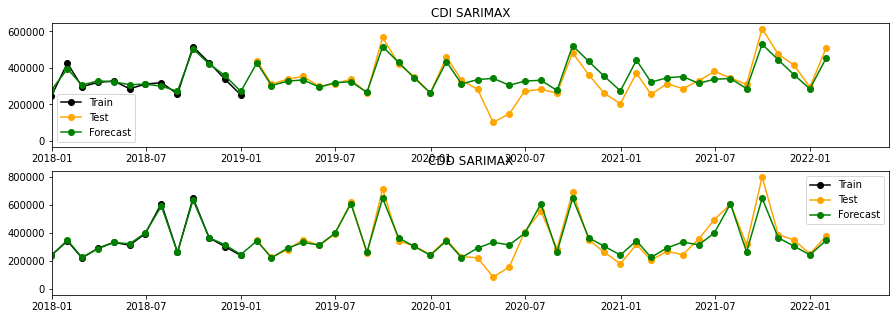

In [ ]:
# do the same forecast using SARIMAX
from statsmodels.tsa.statespace.sarimax import SARIMAX
fit_cdi_sarimax = SARIMAX(np.asarray(train_cdi["DPAE_brut"]), order=(1,1,1), seasonal_order=(1,1,1,12)).fit()

forecast_test_cdi_sarimax = fit_cdi_sarimax.forecast(len(test_cdi))
full_forecast_curve_cdi_sarimax = np.concatenate((fit_cdi_sarimax.fittedvalues, forecast_test_cdi_sarimax))

fig, (ax6,ax7) = plt.subplots(nrows=2,ncols=1)
ax6.plot(train_cdi["DPAE_brut"], marker="o", color="black", label='Train')
ax6.plot(test_cdi["DPAE_brut"], marker="o", color="orange", label='Test')
ax6.plot(df_cdi.index,full_forecast_curve_cdi_sarimax, marker="o", color="green", label='Forecast')
#zoom the plt to see the forecast
ax6.set_xlim(dt.datetime(2018, 1, 1), dt.datetime(2022, 6, 1), -1, 1)
ax6.legend()
ax6.set_title("CDI SARIMAX")

fit_cdd_sarimax = SARIMAX(np.asarray(train_cdd["DPAE_brut"]), order=(1,1,1), seasonal_order=(1,1,1,12)).fit()
forecast_test_cdd_sarimax = fit_cdd_sarimax.forecast(len(test_cdd))
full_forecast_curve_cdd_sarimax = np.concatenate((fit_cdd_sarimax.fittedvalues, forecast_test_cdd_sarimax))

ax7.plot(train_cdd["DPAE_brut"], marker="o", color="black", label='Train')
ax7.plot(test_cdd["DPAE_brut"], marker="o", color="orange", label='Test')
ax7.plot(df_cdd.index,full_forecast_curve_cdd_sarimax, marker="o", color="green", label='Forecast')
ax7.set_xlim(dt.datetime(2018, 1, 1), dt.datetime(2022, 6, 1), -1, 1)
ax7.legend()
ax7.set_title("CDD SARIMAX")
plt.show()


In [ ]:
# evaluate the accuracy of the model
from sklearn.metrics import mean_squared_error
from math import sqrt
error_cdi_sarimax = mean_squared_error(test_cdi["DPAE_brut"],forecast_test_cdi_sarimax)
error_cdd_sarimax = mean_squared_error(test_cdd["DPAE_brut"],forecast_test_cdd_sarimax)

print("The RMSE of the model on the test set for CDI is : ", sqrt(error_cdi_sarimax))
print("The RMSE of the model on the test set for CDD is : ", sqrt(error_cdd_sarimax))
#give the rmse normalized by the mean of the test set
print("The RMSE normalized by the mean of the test set for CDI is : ", sqrt(error_cdi_sarimax)/np.mean(test_cdi["DPAE_brut"]))
print("The RMSE normalized by the mean of the test set for CDD is : ", sqrt(error_cdd_sarimax)/np.mean(test_cdd["DPAE_brut"]))

print("-----------------------------------------------------------------------------------------------")

#error excluding 2020 crisis
error_cdi_sarimax_2020 = mean_squared_error(test_cdi["DPAE_brut"][test_cdi["Annee"]!=2020],forecast_test_cdi_sarimax[test_cdi["Annee"]!=2020])
error_cdd_sarimax_2020 = mean_squared_error(test_cdd["DPAE_brut"][test_cdd["Annee"]!=2020],forecast_test_cdd_sarimax[test_cdd["Annee"]!=2020])
#print it
print("The RMSE of the model on the test set for CDI excluding 2020 is : ", sqrt(error_cdi_sarimax_2020))
print("The RMSE of the model on the test set for CDD excluding 2020 is : ", sqrt(error_cdd_sarimax_2020))
print("The RMSE normalized by the mean of the test set for CDI excluding 2020 is : ", sqrt(error_cdi_sarimax_2020)/np.mean(test_cdi["DPAE_brut"][test_cdi["Annee"]!=2020]))
print("The RMSE normalized by the mean of the test set for CDD excluding 2020 is : ", sqrt(error_cdd_sarimax_2020)/np.mean(test_cdd["DPAE_brut"][test_cdd["Annee"]!=2020]))

The RMSE of the model on the test set for CDI is :  63177.5451557086
The RMSE of the model on the test set for CDD is :  65665.6453005967
The RMSE normalized by the mean of the test set for CDI is :  0.1854023668111759
The RMSE normalized by the mean of the test set for CDD is :  0.18363271747434537
-----------------------------------------------------------------------------------------------
The RMSE of the model on the test set for CDI excluding 2020 is :  37496.691724956254
The RMSE of the model on the test set for CDD excluding 2020 is :  47393.845122903804
The RMSE normalized by the mean of the test set for CDI excluding 2020 is :  0.10239953862331486
The RMSE normalized by the mean of the test set for CDD excluding 2020 is :  0.12575501313674742


Les erreurs que l'on obtient sont de l'ordre de 20% de la moyenne si l'on prend en compte le début de crise (année 2020), sinon elles sont de l'ordre de 10% avec l'année 2020 exclue Ce sont des erreurs relativement hautes mais qui permettent tout de même d'avoir des prévisions assez fiable, on remarque que les courbes sont plutôt rapporchées dans les deux modèles (crise covid exclue).

In [ ]:
#compare the models
print("sarimax/exp_smoothing ratio of error for CDI : ", error_cdi_sarimax/error_cdi)
print("sarimax/exp_smoothing ratio of error for CDD : ", error_cdd_sarimax/error_cdd)
print("sarimax/exp_smoothing ratio of error for CDI excluding 2020 : ", error_cdi_sarimax_2020/error_cdi_2020)
print("sarimax/exp_smoothing ratio of error for CDD excluding 2020 : ", error_cdd_sarimax_2020/error_cdd_2020)

sarimax/exp_smoothing ratio of error for CDI :  0.9104900083082407
sarimax/exp_smoothing ratio of error for CDD :  0.9839643780443461
sarimax/exp_smoothing ratio of error for CDI excluding 2020 :  1.0183181339745355
sarimax/exp_smoothing ratio of error for CDD excluding 2020 :  0.996162696612974


Nous concluons que sur cette série temporelle, les deux modèles se valent

Essayons maintenant d'entraîner le modèle sur toutes les données dont on dispose :

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:949: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:961: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:949: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:961: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


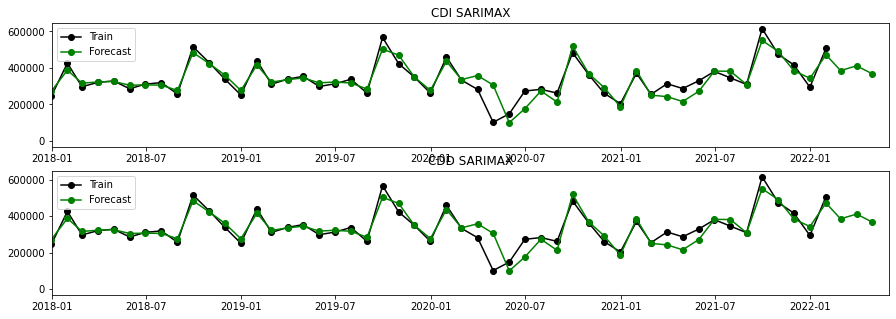

In [ ]:
#new train subset excluding the last 3 values
train_cdi = df_cdi.iloc[:-6]
test_cdi = df_cdi.iloc[-6:]
train_cdd = df_cdi.iloc[:-6]
test_cdd = df_cdi.iloc[-6:]

dates = pd.date_range(start='2022-02-28', end='2022-04-30', freq='M')
dt_index = df_cdi.index.to_series().dt.date
#append df_cdi.index with dates
dt_index = df_cdi.index.append(dates)

fit_cdi_sarimax = SARIMAX(np.asarray(df_cdi["DPAE_brut"]), order=(1,1,1), seasonal_order=(1,1,1,12)).fit()

forecast_cdi_sarimax = fit_cdi_sarimax.forecast(3)
full_forecast_curve_cdi_sarimax = np.concatenate((fit_cdi_sarimax.fittedvalues, forecast_cdi_sarimax))



fig, (ax6,ax7) = plt.subplots(nrows=2,ncols=1)
ax6.plot(df_cdi["DPAE_brut"], marker="o", color="black", label='Train')
ax6.plot(dt_index,full_forecast_curve_cdi_sarimax, marker="o", color="green", label='Forecast')
#zoom the plt to see the forecast
ax6.set_xlim(dt.datetime(2018, 1, 1), dt.datetime(2022, 6, 1), -1, 1)
ax6.legend()
ax6.set_title("CDI SARIMAX")

fit_cdd_sarimax = SARIMAX(np.asarray(df_cdi["DPAE_brut"]), order=(1,1,1), seasonal_order=(1,1,1,12)).fit()
forecast_cdd_sarimax = fit_cdd_sarimax.forecast(3)
full_forecast_curve_cdd_sarimax = np.concatenate((fit_cdd_sarimax.fittedvalues, forecast_cdd_sarimax))

ax7.plot(df_cdi["DPAE_brut"], marker="o", color="black", label='Train')
ax7.plot(dt_index,full_forecast_curve_cdd_sarimax, marker="o", color="green", label='Forecast')
ax7.set_xlim(dt.datetime(2018, 1, 1), dt.datetime(2022, 6, 1), -1, 1)
ax7.legend()
ax7.set_title("CDD SARIMAX")
plt.show()





On peut donc récupérer les prédictions des trois derniers mois d'après le modèle SARIMAX :

In [ ]:
print("The predictions for the last 3 months of CDI are : ", forecast_cdi_sarimax)
print("The predictions for the last 3 months of CDD are : ", forecast_cdd_sarimax)

The predictions for the last 3 months of CDI are :  [385296.65495714 411279.27374822 367675.15279727]
The predictions for the last 3 months of CDD are :  [385296.65495714 411279.27374822 367675.15279727]


In [ ]:
data = ESSA["Emplois salariés trimestriels - Construction - Section F - CVS"].dropna()

train_time = (data.index[-1]-data.index[0])*0.8
test_start_date = (data.index[0] + train_time).year

train = data[data.index < str(test_start_date) + "-01-01"]
test = data[data.index >= str(test_start_date) + "-01-01"]

In [ ]:
train.tail()

Trimestre
2009-10-01    1495.7
2010-01-01    1488.5
2010-04-01    1484.1
2010-07-01    1480.5
2010-10-01    1476.5
Name: Emplois salariés trimestriels - Construction - Section F - CVS, dtype: float64

In [ ]:
test.head()

Trimestre
2011-01-01    1476.5
2011-04-01    1473.4
2011-07-01    1469.1
2011-10-01    1468.2
2012-01-01    1469.9
Name: Emplois salariés trimestriels - Construction - Section F - CVS, dtype: float64

In [ ]:
from statsmodels.tsa.api import ExponentialSmoothing

fit_ESSA = ExponentialSmoothing(np.asarray(train), trend='add', seasonal='add', seasonal_periods=4).fit()
forecast_test_ESSA = fit_ESSA.forecast(len(test))
#the full forecast curve is :
full_forecast_curve_ESSA = np.concatenate((fit_ESSA.fittedvalues, forecast_test_ESSA))

Text(0.5, 1.0, 'Emplois salariés trimestriels - Construction - Section F - CVS')

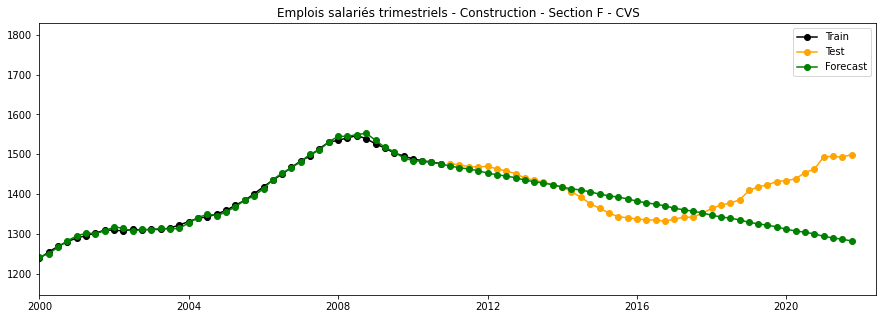

In [ ]:
fig, (ax) = plt.subplots(nrows=1,ncols=1)
ax.plot(train, marker="o", color="black", label='Train')
ax.plot(test, marker="o", color="orange", label='Test')
ax.plot(data.index,full_forecast_curve_ESSA, marker="o", color="green", label='Forecast')
#zoom the plt to see the forecast
ax.set_xlim(dt.datetime(2000, 1, 1), dt.datetime(2022, 6, 1), -1, 1)
ax.legend()
ax.set_title("Emplois salariés trimestriels - Construction - Section F - CVS")

In [ ]:
from sklearn.metrics import mean_squared_error
from math import sqrt
error_ESSA = mean_squared_error(test,forecast_test_ESSA)

print("The RMSE of the model on this test set is : ", sqrt(error_ESSA))


The RMSE of the model on this test set is :  84.41618589644494


In [ ]:
print("The RMSE normalized by the mean of this test set is : ", sqrt(error_ESSA)/np.mean(test))

The RMSE normalized by the mean of this test set is :  0.059794939903305484


Text(0.5, 1.0, 'Emplois salariés trimestriels - Construction - Section F - CVS')

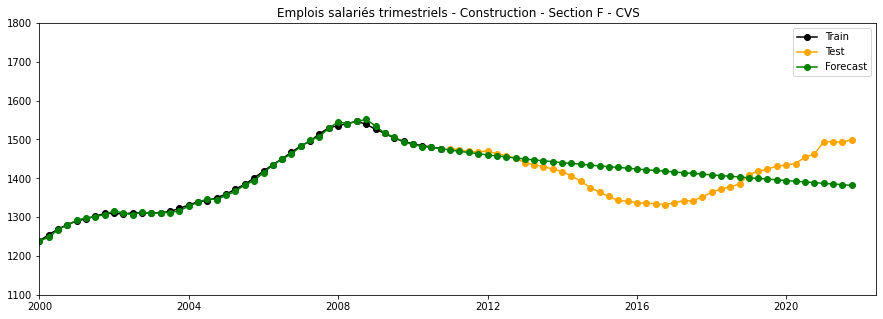

In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
fit_ESSA_sarimax = SARIMAX(np.asarray(train), order=(1,1,1), seasonal_order=(1,1,1,4)).fit()

forecast_test_ESSA_sarimax = fit_ESSA_sarimax.forecast(len(test))
full_forecast_curve_ESSA_sarimax = np.concatenate((fit_ESSA_sarimax.fittedvalues, forecast_test_ESSA_sarimax))

fig, (ax) = plt.subplots(nrows=1,ncols=1)
ax.plot(train, marker="o", color="black", label='Train')
ax.plot(test, marker="o", color="orange", label='Test')
ax.plot(data.index,full_forecast_curve_ESSA_sarimax, marker="o", color="green", label='Forecast')
#zoom the plt to see the forecast
ax.set_xlim(dt.datetime(2000, 1, 1), dt.datetime(2022, 6, 1), -1, 1)
ax.set_ylim(1100,1800)
ax.legend()
ax.set_title("Emplois salariés trimestriels - Construction - Section F - CVS")

In [ ]:
from sklearn.metrics import mean_squared_error
from math import sqrt
error_ESSA_sarimax = mean_squared_error(test,forecast_test_ESSA_sarimax)

print("The RMSE of the model on this test set is : ", sqrt(error_ESSA_sarimax))

print("The RMSE normalized by the mean of this test set is : ", sqrt(error_ESSA_sarimax)/np.mean(test))

The RMSE of the model on this test set is :  58.60060703572845
The RMSE normalized by the mean of this test set is :  0.04150886158605952


In [ ]:
print("sarimax/exp_smoothing ratio of error : ", error_ESSA_sarimax/error_ESSA)

sarimax/exp_smoothing ratio of error :  0.4818953968449902


In [ ]:
data.index

DatetimeIndex(['1970-10-01', '1971-01-01', '1971-04-01', '1971-07-01',
               '1971-10-01', '1972-01-01', '1972-04-01', '1972-07-01',
               '1972-10-01', '1973-01-01',
               ...
               '2019-07-01', '2019-10-01', '2020-01-01', '2020-04-01',
               '2020-07-01', '2020-10-01', '2021-01-01', '2021-04-01',
               '2021-07-01', '2021-10-01'],
              dtype='datetime64[ns]', name='Trimestre', length=205, freq=None)

Text(0.5, 1.0, 'Emplois salariés trimestriels - Construction - Section F - CVS')

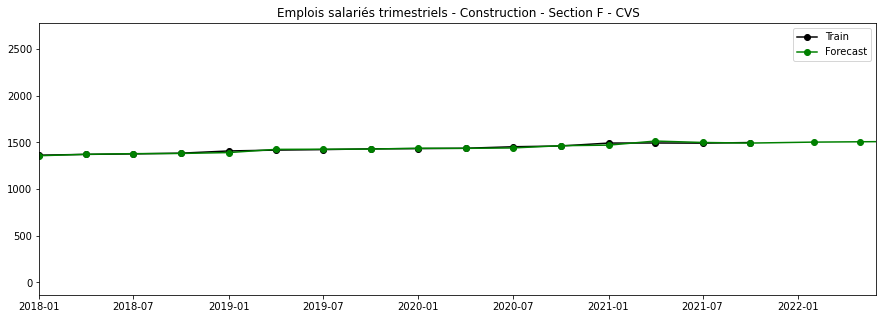

In [ ]:
#new train subset excluding the last 3 values
train_ESSA = data.iloc[:-6]
test_ESSA = data.iloc[-6:]

dates = pd.date_range(start='2022-01-1', end='2022-10-01', freq='3M')

dt_index = data.index.to_series().dt.date
#append df_cdi.index with dates
dt_index = data.index.append(dates)

fit_ESSA_sarimax = SARIMAX(np.asarray(data), order=(1,1,1), seasonal_order=(1,1,1,4)).fit()

forecast_ESSA_sarimax = fit_ESSA_sarimax.forecast(3)
full_forecast_curve_ESSA_sarimax = np.concatenate((fit_ESSA_sarimax.fittedvalues, forecast_ESSA_sarimax))



fig, ax = plt.subplots(nrows=1,ncols=1)
ax.plot(data, marker="o", color="black", label='Train')
ax.plot(dt_index,full_forecast_curve_ESSA_sarimax, marker="o", color="green", label='Forecast')
#zoom the plt to see the forecast
ax.set_xlim(dt.datetime(2018, 1, 1), dt.datetime(2022, 6, 1), -1, 1)
ax.legend()
ax.set_title("Emplois salariés trimestriels - Construction - Section F - CVS")


In [ ]:
print("The predictions for the last 3 months are : ", forecast_ESSA_sarimax)

The predictions for the last 3 months are :  [1503.88443642 1507.6481355  1511.18694351]


In [ ]:
data = ESSA["Emplois salariés trimestriels - Activités financières et d'assurance - A38 : KZ - CVS"].dropna()

train_time = (data.index[-1]-data.index[0])*0.8
test_start_date = (data.index[0] + train_time).year

train = data[data.index < str(test_start_date) + "-01-01"]
test = data[data.index >= str(test_start_date) + "-01-01"]

In [ ]:
from statsmodels.tsa.api import ExponentialSmoothing

fit_ESSA = ExponentialSmoothing(np.asarray(train), trend='add', seasonal='add', seasonal_periods=4).fit()
forecast_test_ESSA = fit_ESSA.forecast(len(test))
#the full forecast curve is :
full_forecast_curve_ESSA = np.concatenate((fit_ESSA.fittedvalues, forecast_test_ESSA))

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:712: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)


Text(0.5, 1.0, "Emplois salariés trimestriels - Activités financières et d'assurance - A38 : KZ - CVS")

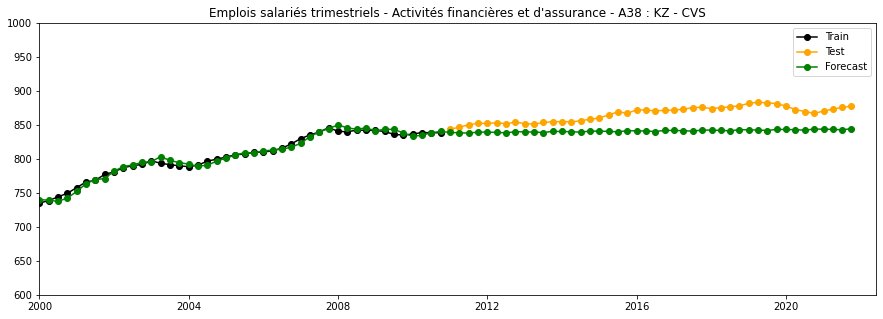

In [ ]:
fig, (ax) = plt.subplots(nrows=1,ncols=1)
ax.plot(train, marker="o", color="black", label='Train')
ax.plot(test, marker="o", color="orange", label='Test')
ax.plot(data.index,full_forecast_curve_ESSA, marker="o", color="green", label='Forecast')
#zoom the plt to see the forecast
ax.set_xlim(dt.datetime(2000, 1, 1), dt.datetime(2022, 6, 1), -1, 1)
ax.set_ylim(600,1000)
ax.legend()
ax.set_title("Emplois salariés trimestriels - Activités financières et d'assurance - A38 : KZ - CVS")

In [ ]:
from sklearn.metrics import mean_squared_error
from math import sqrt
error_ESSA = mean_squared_error(test,forecast_test_ESSA)

print("The RMSE of the model on this test set is : ", sqrt(error_ESSA))

The RMSE of the model on this test set is :  26.656215669385926


In [ ]:
print("The RMSE normalized by the mean of this test set is : ", sqrt(error_ESSA)/np.mean(test))

The RMSE normalized by the mean of this test set is :  0.030784081088004737


Text(0.5, 1.0, "Emplois salariés trimestriels - Activités financières et d'assurance - A38 : KZ - CVS")

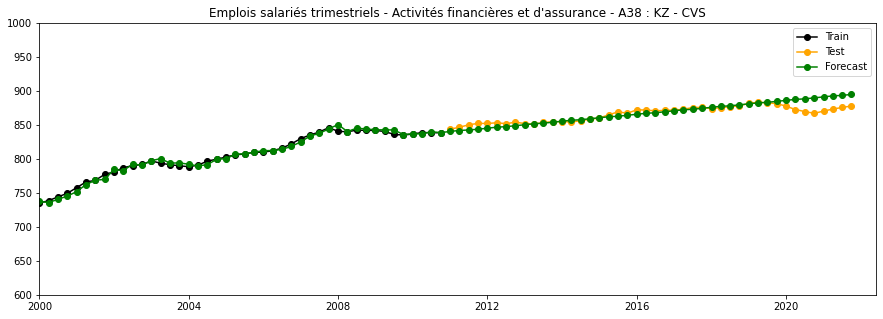

In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
fit_ESSA_sarimax = SARIMAX(np.asarray(train), order=(1,1,1), seasonal_order=(1,1,1,4)).fit()

forecast_test_ESSA_sarimax = fit_ESSA_sarimax.forecast(len(test))
full_forecast_curve_ESSA_sarimax = np.concatenate((fit_ESSA_sarimax.fittedvalues, forecast_test_ESSA_sarimax))

fig, ax = plt.subplots(nrows=1,ncols=1)
ax.plot(train, marker="o", color="black", label='Train')
ax.plot(test, marker="o", color="orange", label='Test')
ax.plot(data.index,full_forecast_curve_ESSA_sarimax, marker="o", color="green", label='Forecast')
#zoom the plt to see the forecast
ax.set_xlim(dt.datetime(2000, 1, 1), dt.datetime(2022, 6, 1), -1, 1)
ax.set_ylim(600,1000)
ax.legend()
ax.set_title("Emplois salariés trimestriels - Activités financières et d'assurance - A38 : KZ - CVS")

In [ ]:
from sklearn.metrics import mean_squared_error
from math import sqrt
error_ESSA_sarimax = mean_squared_error(test,forecast_test_ESSA_sarimax)

print("The RMSE of the model on this test set is : ", sqrt(error_ESSA_sarimax))

print("The RMSE normalized by the mean of this test set is : ", sqrt(error_ESSA_sarimax)/np.mean(test))

The RMSE of the model on this test set is :  8.346405381560414
The RMSE normalized by the mean of this test set is :  0.009638893354033022


In [ ]:
print("sarimax/exp_smoothing ratio of error : ", error_ESSA_sarimax/error_ESSA)

sarimax/exp_smoothing ratio of error :  0.09803969731544948


Text(0.5, 1.0, "Emplois salariés trimestriels - Activités financières et d'assurance - A38 : KZ - CVS")

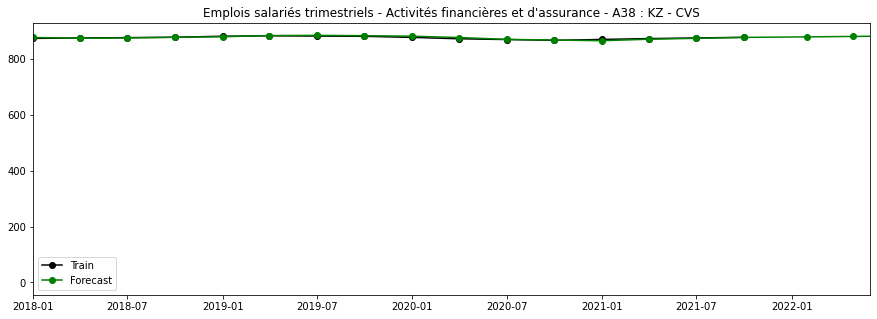

In [ ]:
#new train subset excluding the last 3 values
train_ESSA = data.iloc[:-6]
test_ESSA = data.iloc[-6:]

dates = pd.date_range(start='2022-01-1', end='2022-10-01', freq='3M')

dt_index = data.index.to_series().dt.date
#append df_cdi.index with dates
dt_index = data.index.append(dates)

fit_ESSA_sarimax = SARIMAX(np.asarray(data), order=(1,1,1), seasonal_order=(1,1,1,4)).fit()

forecast_ESSA_sarimax = fit_ESSA_sarimax.forecast(3)
full_forecast_curve_ESSA_sarimax = np.concatenate((fit_ESSA_sarimax.fittedvalues, forecast_ESSA_sarimax))



fig, ax = plt.subplots(nrows=1,ncols=1)
ax.plot(data, marker="o", color="black", label='Train')
ax.plot(dt_index,full_forecast_curve_ESSA_sarimax, marker="o", color="green", label='Forecast')
#zoom the plt to see the forecast
ax.set_xlim(dt.datetime(2018, 1, 1), dt.datetime(2022, 6, 1), -1, 1)
ax.legend()
ax.set_title("Emplois salariés trimestriels - Activités financières et d'assurance - A38 : KZ - CVS")

In [ ]:
print("The predictions for the last 3 months are : ", forecast_ESSA_sarimax)

The predictions for the last 3 months are :  [879.41580685 881.20262684 882.57964581]


In [ ]:
data = ESSA["Emplois salariés trimestriels - Enseignement - A38 : PZ - CVS"].dropna()

train_time = (data.index[-1]-data.index[0])*0.8
test_start_date = (data.index[0] + train_time).year

train = data[data.index < str(test_start_date) + "-01-01"]
test = data[data.index >= str(test_start_date) + "-01-01"]

In [ ]:
from statsmodels.tsa.api import ExponentialSmoothing

fit_ESSA = ExponentialSmoothing(np.asarray(train), trend='add', seasonal='add', seasonal_periods=4).fit()
forecast_test_ESSA = fit_ESSA.forecast(len(test))
#the full forecast curve is :
full_forecast_curve_ESSA = np.concatenate((fit_ESSA.fittedvalues, forecast_test_ESSA))

Text(0.5, 1.0, 'Emplois salariés trimestriels - Enseignement - A38 : PZ - CVS')

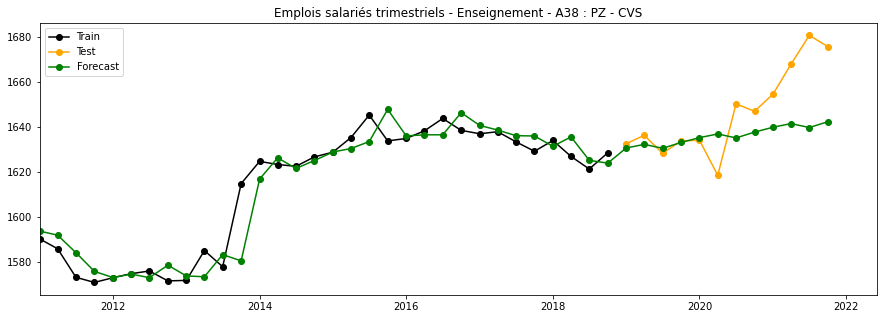

In [ ]:
fig, (ax) = plt.subplots(nrows=1,ncols=1)
ax.plot(train, marker="o", color="black", label='Train')
ax.plot(test, marker="o", color="orange", label='Test')
ax.plot(data.index,full_forecast_curve_ESSA, marker="o", color="green", label='Forecast')
#zoom the plt to see the forecast
ax.set_xlim(dt.datetime(2011, 1, 1), dt.datetime(2022, 6, 1), -1, 1)
ax.legend()
ax.set_title("Emplois salariés trimestriels - Enseignement - A38 : PZ - CVS")

In [ ]:
from sklearn.metrics import mean_squared_error
from math import sqrt
error_ESSA = mean_squared_error(test,forecast_test_ESSA)

print("The RMSE of the model on this test set is : ", sqrt(error_ESSA))

The RMSE of the model on this test set is :  19.153489532361146


In [ ]:
print("The RMSE normalized by the mean of this test set is : ", sqrt(error_ESSA)/np.mean(test))

The RMSE normalized by the mean of this test set is :  0.011632321353331093


Text(0.5, 1.0, 'Emplois salariés trimestriels - Enseignement - A38 : PZ - CVS')

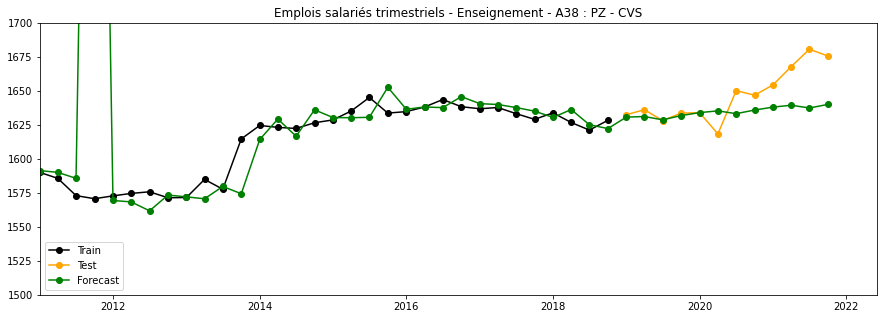

In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
fit_ESSA_sarimax = SARIMAX(np.asarray(train), order=(1,1,1), seasonal_order=(1,1,1,4)).fit()

forecast_test_ESSA_sarimax = fit_ESSA_sarimax.forecast(len(test))
full_forecast_curve_ESSA_sarimax = np.concatenate((fit_ESSA_sarimax.fittedvalues, forecast_test_ESSA_sarimax))

fig, (ax) = plt.subplots(nrows=1,ncols=1)
ax.plot(train, marker="o", color="black", label='Train')
ax.plot(test, marker="o", color="orange", label='Test')
ax.plot(data.index,full_forecast_curve_ESSA_sarimax, marker="o", color="green", label='Forecast')
#zoom the plt to see the forecast
ax.set_xlim(dt.datetime(2011, 1, 1), dt.datetime(2022, 6, 1), -1, 1)
ax.set_ylim(1500,1700)
ax.legend()
ax.set_title("Emplois salariés trimestriels - Enseignement - A38 : PZ - CVS")

In [ ]:
from sklearn.metrics import mean_squared_error
from math import sqrt
error_ESSA_sarimax = mean_squared_error(test,forecast_test_ESSA_sarimax)

print("The RMSE of the model on this test set is : ", sqrt(error_ESSA_sarimax))

print("The RMSE normalized by the mean of this test set is : ", sqrt(error_ESSA_sarimax)/np.mean(test))

The RMSE of the model on this test set is :  20.28217834867994
The RMSE normalized by the mean of this test set is :  0.012317798064880092


In [ ]:
print("sarimax/exp_smoothing ratio of error : ", error_ESSA_sarimax/error_ESSA)

sarimax/exp_smoothing ratio of error :  1.1213298344172746


Text(0.5, 1.0, 'Emplois salariés trimestriels - Enseignement - A38 : PZ - CVS')

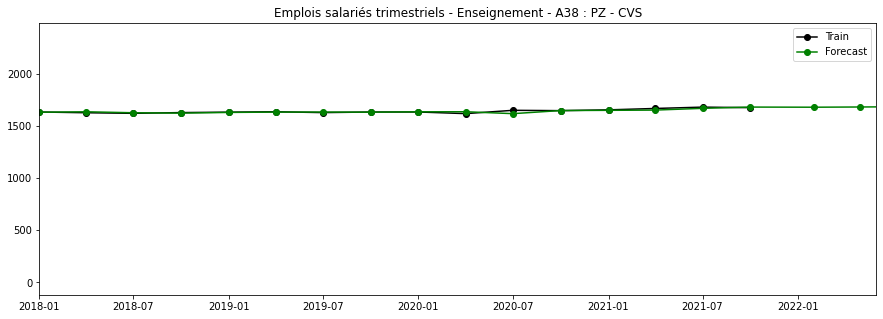

In [ ]:
#new train subset excluding the last 3 values
train_ESSA = data.iloc[:-6]
test_ESSA = data.iloc[-6:]

dates = pd.date_range(start='2022-01-1', end='2022-10-01', freq='3M')

dt_index = data.index.to_series().dt.date
#append df_cdi.index with dates
dt_index = data.index.append(dates)

fit_ESSA_sarimax = SARIMAX(np.asarray(data), order=(1,1,1), seasonal_order=(1,1,1,4)).fit()

forecast_ESSA_sarimax = fit_ESSA_sarimax.forecast(3)
full_forecast_curve_ESSA_sarimax = np.concatenate((fit_ESSA_sarimax.fittedvalues, forecast_ESSA_sarimax))



fig, ax = plt.subplots(nrows=1,ncols=1)
ax.plot(data, marker="o", color="black", label='Train')
ax.plot(dt_index,full_forecast_curve_ESSA_sarimax, marker="o", color="green", label='Forecast')
#zoom the plt to see the forecast
ax.set_xlim(dt.datetime(2018, 1, 1), dt.datetime(2022, 6, 1), -1, 1)
ax.legend()
ax.set_title("Emplois salariés trimestriels - Enseignement - A38 : PZ - CVS")

In [ ]:
print("The predictions for the last 3 months are : ", forecast_ESSA_sarimax)

The predictions for the last 3 months are :  [1679.84743817 1681.94736343 1684.81706378]


In [ ]:
data = ESSA["Emplois salariés trimestriels - Intérim - A38 : NZ, intérim - CVS"].dropna()

train_time = (data.index[-1]-data.index[0])*0.8
test_start_date = (data.index[0] + train_time).year

train = data[data.index < str(test_start_date) + "-01-01"]
test = data[data.index >= str(test_start_date) + "-01-01"]

In [ ]:
from statsmodels.tsa.api import ExponentialSmoothing

fit_ESSA = ExponentialSmoothing(np.asarray(train), trend='add', seasonal='add', seasonal_periods=4).fit()
forecast_test_ESSA = fit_ESSA.forecast(len(test))
#the full forecast curve is :
full_forecast_curve_ESSA = np.concatenate((fit_ESSA.fittedvalues, forecast_test_ESSA))

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:712: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)


Text(0.5, 1.0, 'Emplois salariés trimestriels - Intérim - A38 : NZ, intérim - CVS')

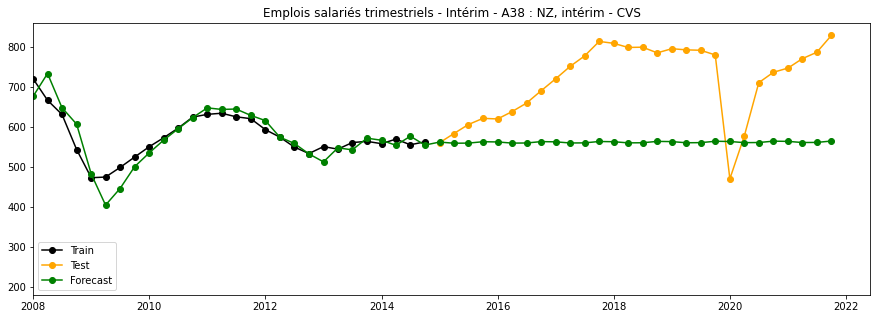

In [ ]:
fig, (ax) = plt.subplots(nrows=1,ncols=1)
ax.plot(train, marker="o", color="black", label='Train')
ax.plot(test, marker="o", color="orange", label='Test')
ax.plot(data.index,full_forecast_curve_ESSA, marker="o", color="green", label='Forecast')
#zoom the plt to see the forecast
ax.set_xlim(dt.datetime(2008, 1, 1), dt.datetime(2022, 6, 1), -1, 1)
ax.legend()
ax.set_title("Emplois salariés trimestriels - Intérim - A38 : NZ, intérim - CVS")

In [ ]:
from sklearn.metrics import mean_squared_error
from math import sqrt
error_ESSA = mean_squared_error(test,forecast_test_ESSA)

print("The RMSE of the model on the test set for CDI is : ", sqrt(error_ESSA))


The RMSE of the model on the test set for CDI is :  179.83756997713564


In [ ]:
print("The RMSE normalized by the mean of the test set for CDI is : ", sqrt(error_ESSA)/np.mean(test))

The RMSE normalized by the mean of the test set for CDI is :  0.25135660279037186


Text(0.5, 1.0, 'Emplois salariés trimestriels - Intérim - A38 : NZ, intérim - CVS')

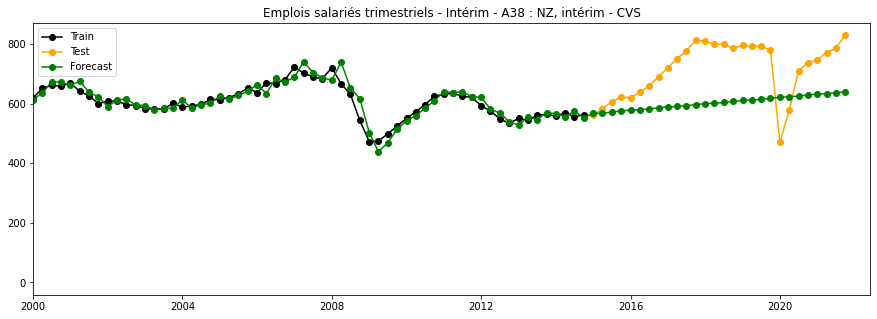

In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
fit_ESSA_sarimax = SARIMAX(np.asarray(train), order=(1,1,1), seasonal_order=(1,1,1,4)).fit()

forecast_test_ESSA_sarimax = fit_ESSA_sarimax.forecast(len(test))
full_forecast_curve_ESSA_sarimax = np.concatenate((fit_ESSA_sarimax.fittedvalues, forecast_test_ESSA_sarimax))

fig, (ax) = plt.subplots(nrows=1,ncols=1)
ax.plot(train, marker="o", color="black", label='Train')
ax.plot(test, marker="o", color="orange", label='Test')
ax.plot(data.index,full_forecast_curve_ESSA_sarimax, marker="o", color="green", label='Forecast')
#zoom the plt to see the forecast
ax.set_xlim(dt.datetime(2000, 1, 1), dt.datetime(2022, 6, 1), -1, 1)
#ax.set_ylim(1100,1800)
ax.legend()
ax.set_title("Emplois salariés trimestriels - Intérim - A38 : NZ, intérim - CVS")

In [ ]:
from sklearn.metrics import mean_squared_error
from math import sqrt
error_ESSA_sarimax = mean_squared_error(test,forecast_test_ESSA_sarimax)

print("The RMSE of the model on this test set is : ", sqrt(error_ESSA_sarimax))

print("The RMSE normalized by the mean of this test set is : ", sqrt(error_ESSA_sarimax)/np.mean(test))

The RMSE of the model on this test set is :  141.7003034803421
The RMSE normalized by the mean of this test set is :  0.19805264774046846


In [ ]:
print("sarimax/exp_smoothing ratio of error : ", error_ESSA_sarimax/error_ESSA)

sarimax/exp_smoothing ratio of error :  0.6208414571478856


Text(0.5, 1.0, 'Emplois salariés trimestriels - Intérim - A38 : NZ, intérim - CVS')

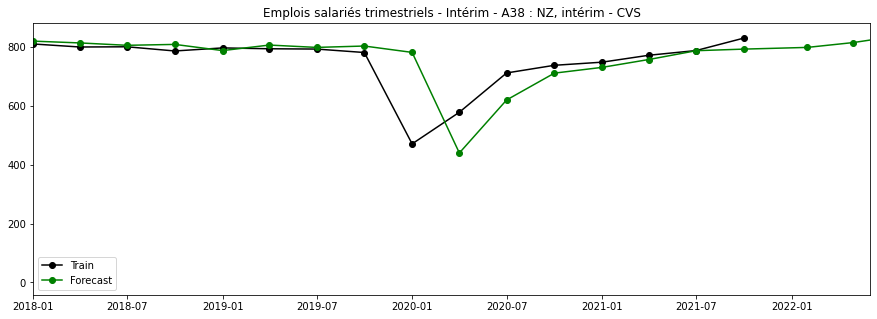

In [ ]:
#new train subset excluding the last 3 values
train_ESSA = data.iloc[:-6]
test_ESSA = data.iloc[-6:]

dates = pd.date_range(start='2022-01-1', end='2022-10-01', freq='3M')

dt_index = data.index.to_series().dt.date
#append df_cdi.index with dates
dt_index = data.index.append(dates)

fit_ESSA_sarimax = SARIMAX(np.asarray(data), order=(1,1,1), seasonal_order=(1,1,1,4)).fit()

forecast_ESSA_sarimax = fit_ESSA_sarimax.forecast(3)
full_forecast_curve_ESSA_sarimax = np.concatenate((fit_ESSA_sarimax.fittedvalues, forecast_ESSA_sarimax))



fig, ax = plt.subplots(nrows=1,ncols=1)
ax.plot(data, marker="o", color="black", label='Train')
ax.plot(dt_index,full_forecast_curve_ESSA_sarimax, marker="o", color="green", label='Forecast')
#zoom the plt to see the forecast
ax.set_xlim(dt.datetime(2018, 1, 1), dt.datetime(2022, 6, 1), -1, 1)
ax.legend()
ax.set_title("Emplois salariés trimestriels - Intérim - A38 : NZ, intérim - CVS")

In [ ]:
print("The predictions for the last 3 months are : ", forecast_ESSA_sarimax)

The predictions for the last 3 months are :  [797.70682675 814.21141916 838.62067814]
